- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

from functions import *
from preprocess_NLP import *
from os import listdir
from os.path import isfile, join

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ### WARNINGS !!
from PIL import Image

# import plotly as px

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,text,category,target
33,Key Features of SANTOSH ROYAL FASHION Cotton E...,Home Furnishing,4
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
38,Key Features of BFT 6 W LED Bulb Pack of 1 Bul...,Kitchen & Dining,5
326,Buy TRENDnet TEW-752DRU only for Rs. 5199 from...,Computers,2
786,Perucci PC-122 Decker Analog Watch - For Men ...,Watches,6
948,Arabian Nights Soex Cranberry Assorted Hookah ...,Home Decor & Festive Needs,3
198,Surface180 Wonderful Wooden Antique Drawer Box...,Home Decor & Festive Needs,3
616,Key Features of Pokizo Baby Girl's A-line Dres...,Baby Care,0
78,Key Features of Jaipur Print Cotton Floral Diw...,Home Furnishing,4
746,Buy eCraftIndia Floral Cushions Cover at Rs. 4...,Home Furnishing,4


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1050 non-null   object
 1   category  1050 non-null   object
 2   target    1050 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.7+ KB


In [8]:
data_text.isna().sum()

text        0
category    0
target      0
dtype: int64

In [9]:
data_text.isna().mean()

text        0.0
category    0.0
target      0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [11]:
data_text.nunique()

text        1050
category       7
target         7
dtype: int64

In [12]:
data_text.shape

(1050, 3)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,text,category,target


In [14]:
data_text.describe(include="object")

,text,category
count,1050,1050
unique,1050,7
top,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

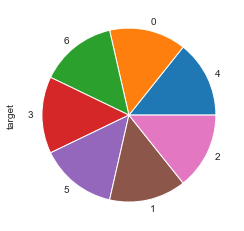

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
data_text.text.apply(lambda i: len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: text, Length: 1050, dtype: int64

<AxesSubplot:xlabel='text'>

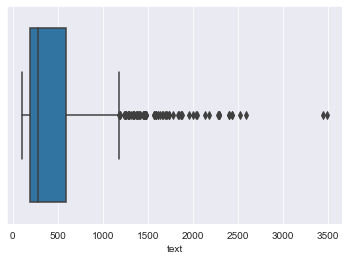

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

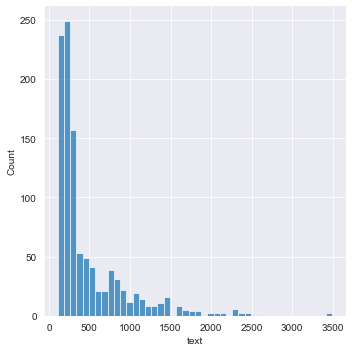

In [19]:
sns.displot(tmp)

In [20]:
data_text

,text,category,target,_len_txt_
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,1660
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,262
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,210


##### Multivariate analysis

In [21]:
corr = data_text.corr()
corr

,target,_len_txt_
target,1.000000,-0.020285
_len_txt_,-0.020285,1.000000


<AxesSubplot:>

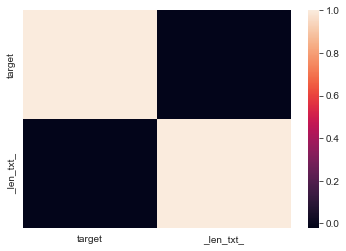

In [22]:
sns.heatmap(corr)

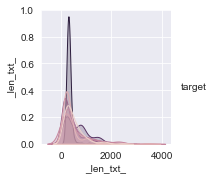

In [23]:
sns.pairplot(data_text, hue="target")

In [24]:
data_text.sort_values("_len_txt_").head(10)

,text,category,target,_len_txt_
877,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109
890,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109
1030,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111
651,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112
892,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112
599,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112
1005,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113
678,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114
874,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114
884,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114


In [25]:
data_text.sort_values("_len_txt_").tail(10)

,text,category,target,_len_txt_
433,"Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297
435,"Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298
696,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405
694,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436
916,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529
715,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594
639,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447
437,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490


In [26]:
data_text = data_text.drop(columns=["_len_txt_"])
data_text

,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


#### Explore corpus and documents

##### 1) print N random documents

In [27]:
df_sample = data_text.sample(20)
df_sample

,text,category,target
907,Key Features of Fs Mini Klub Baby Boy's Woven ...,Baby Care,0
131,Prithish Word of The Day: Bullshit Double Colo...,Kitchen & Dining,5
896,Rustic India Geometric Cushions Cover (Pack of...,Home Furnishing,4
595,"Specifications of Mayursflora Bonsai Aloe, Map...",Home Decor & Festive Needs,3
525,SF by Sonata 7991PP02 Ocean Digital Watch - F...,Watches,6
92,Buy Exotic India Vaishnava Symbols - Shankha A...,Home Decor & Festive Needs,3
498,Times Times_51 Party-Wedding Analog Watch - F...,Watches,6
257,Buy Unravel India Showpiece - 16 cm for Rs.1...,Home Decor & Festive Needs,3
91,Buy Aapno Rajasthan Princess Design Showpiece ...,Home Decor & Festive Needs,3
86,Key Features of oxford Tawa 15 cm cm diameter ...,Kitchen & Dining,5


In [28]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 0
Key Features of Fs Mini Klub Baby Boy's Woven Casual Shirt Fit: Regular Fabric: 100% Cotton Suitable For: Western Wear Sleeve: Half Sleeve,Specifications of Fs Mini Klub Baby Boy's Woven Casual Shirt General Details Pattern Woven Ideal For Baby Boy's Occasion Casual Shirt Details Sleeve Half Sleeve Number of Contents in Sales Package Pack of 1 Brand Fit Regular Fabric 100% Cotton Fit Regular Fabric Care Wash with Similar color Additional Details Style Code 88EBTSH0565 W...


target: 5
Prithish Word of The Day: Bullshit Double Color Ceramic Mug (330 ml)
                         Price: Rs. 225
				
			"Get Talking With Your Coffee! Our Wide Selection Of Cute And Catchy Designs Means You'Re Sure To Find The Quote That Says What It Is, The Way It Is. And If These Mugs Bring On The Smiles, Don'T Forget To Share Them. Mugs Like These Make Great Gifts! Each Mug Is Beautifully Designed With Quality Ink And Attractive Graphics, Perfect For All Around Enjoyment." "Express Yourself! Our

##### 2) print documents vs target

In [29]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [30]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,text,category,target
43,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [31]:
print_sample(df_1)

target: 1
SSCP Pine Oil (30 ml)
                         Price: Rs. 319
				
			Pine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorating effect on an area and is great for vapor therapy in a sick room as it promotes healing. It can be used for cuts and sores, scabies and lice and for excessive perspiration, while its warming properties help with rheumatism, arthritis, gout, muscular aches and pains and it can stimulate circulation. Furthermore it can help in cases of bronchitis, asthma, catarrh, coughs, laryngitis, colds and flu. It eases breathlessness and sinusitis.
Pine oil is most useful to relieve mental, physical and sexual fatigue, while having a cleansing and invigorating effect on an area and is great for vapor therapy in a sick room as it promotes healing. It can be used for cuts and sores, scabies and lice and for excessive perspiration, while its warming properties help with rheumatism, arthritis, gout, muscular aches

In [32]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
Lenco Bdblue Tango Analog Watch  - For Men, Boys - Buy Lenco Bdblue Tango Analog Watch  - For Men, Boys  Bdblue Online at Rs.599 in India Only at Flipkart.com. Sports Watch, Casual Watch, Big Size Dial, Colourful Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Specifications of ESIDON AKADA06 Analog Watch  - For Women General Type Analog Style Code AKADA06 Ideal For Women Occasion Party-Wedding Warranty 3-month Body Features Dial Shape Round Strap Color Gold Dial Color White...


target: 6
Timewel N1536(GW)_1 Analog Watch  - For Men - Buy Timewel N1536(GW)_1 Analog Watch  - For Men  N1536(GW)_1 Online at Rs.855 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Maxima 03918CMLY Analog Watch  - For Women - Buy Maxima 03918CMLY Analog Watch  - For Women  03918CMLY Online at Rs.795 in India Only at Flipk

## Part II : Text processing

##### Downloads and options

In [33]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [34]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [35]:
# init sns
sns.set()

##### Loading data

In [36]:
data_text.head()

,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [37]:
data_text.shape

(1050, 3)

### I) Cleaning the corpus

#### Work on a specific document

In [38]:
# select a random document

doc = data_text.text.sample(1) # get a row
doc = doc.values[0] # get a numpy array
doc

'Orange Tree Maxim Wall Decor Set Of 3 Showpiece  -  4 cm (Iron, Gold)\r\n                         Price: Rs. 1,999\r\n\t\t\t\t\r\n\t\t\tMetal saucer with a hammered look floats a classic round mirror in the center. These set of 3 in ant. Copper plating lets your imagination loose by creating interesting combinations on any wall surface\r\nMetal saucer with a hammered look floats a classic round mirror in the center. These set of 3 in ant. Copper plating lets your imagination loose by creating interesting combinations on any wall surface'

##### 1) Lower

In [39]:
doc = doc.lower()
doc

'orange tree maxim wall decor set of 3 showpiece  -  4 cm (iron, gold)\r\n                         price: rs. 1,999\r\n\t\t\t\t\r\n\t\t\tmetal saucer with a hammered look floats a classic round mirror in the center. these set of 3 in ant. copper plating lets your imagination loose by creating interesting combinations on any wall surface\r\nmetal saucer with a hammered look floats a classic round mirror in the center. these set of 3 in ant. copper plating lets your imagination loose by creating interesting combinations on any wall surface'

##### 2) Tokenization

In [40]:
tokens = word_tokenize(doc)
tokens

['orange',
 'tree',
 'maxim',
 'wall',
 'decor',
 'set',
 'of',
 '3',
 'showpiece',
 '-',
 '4',
 'cm',
 '(',
 'iron',
 ',',
 'gold',
 ')',
 'price',
 ':',
 'rs',
 '.',
 '1,999',
 'metal',
 'saucer',
 'with',
 'a',
 'hammered',
 'look',
 'floats',
 'a',
 'classic',
 'round',
 'mirror',
 'in',
 'the',
 'center',
 '.',
 'these',
 'set',
 'of',
 '3',
 'in',
 'ant',
 '.',
 'copper',
 'plating',
 'lets',
 'your',
 'imagination',
 'loose',
 'by',
 'creating',
 'interesting',
 'combinations',
 'on',
 'any',
 'wall',
 'surface',
 'metal',
 'saucer',
 'with',
 'a',
 'hammered',
 'look',
 'floats',
 'a',
 'classic',
 'round',
 'mirror',
 'in',
 'the',
 'center',
 '.',
 'these',
 'set',
 'of',
 '3',
 'in',
 'ant',
 '.',
 'copper',
 'plating',
 'lets',
 'your',
 'imagination',
 'loose',
 'by',
 'creating',
 'interesting',
 'combinations',
 'on',
 'any',
 'wall',
 'surface']

In [41]:
len(tokens)

94

In [42]:
len(set(tokens))

50

In [43]:
display_tokens_info(tokens)

nb tokens 94, nb tokens uniques 50
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', 'of', '3', 'showpiece', '-', '4', 'cm', '(', 'iron', ',', 'gold', ')', 'price', ':', 'rs', '.', '1,999', 'metal', 'saucer', 'with', 'a', 'hammered', 'look', 'floats', 'a']
['iron', 'hammered', 'with', '-', 'price', ':', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'of', 'metal', '3', 'tree', '4', 'saucer', 'a', 'gold', 'floats', 'wall', 'orange', ')', 'set', ',', '1,999', '.', 'cm', '(']


In [44]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 96, nb tokens uniques 51
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', 'of', '3', 'showpiece', '-', '4', 'cm', '(', 'iron', ',', 'gold', ')', 'price', ':', 'rs', '.', '1', ',', '999', 'metal', 'saucer', 'with', 'a', 'hammered', 'look']
['iron', 'hammered', 'with', '-', '999', 'price', ':', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'of', 'metal', '3', 'tree', '4', '1', 'saucer', 'a', 'gold', 'wall', 'orange', ')', 'set', ',', '.', 'cm', '(']


##### 3) Stopwords

In [45]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'i', 'hadn', 'below', 'do', 'doesn', 'weren', 'himself', 'only', 'if', 'who', 'his', 'on', 'during', "won't", 'theirs', 'he', 'here', 'off', 't', 'itself', 'all', 'been', 'just', 'to', 'above', 'once', 'has', 'at', 'more', "shan't", 've', 'didn', 'me', 'ours', 'him', 'ain', 'themselves', 'with', 'so', 'yourselves', 'needn', 'ourselves', 'my', 's', 'isn', 'that', 'what', 'while', 'you', 'other', 'some', 'won', 'further', 'very', 'too', 'does', 'then', "didn't", "mightn't", 'o', 'shan', 'those', 'is', 'its', 'for', 'again', 'a', 'over', 'until', 'can', "should've", 'd', "wasn't", 'she', 'ma', 'but', "don't", "shouldn't", 'shouldn', "mustn't", 'it', 'each', 'aren', 'or', "wouldn't", "hadn't", 'm', "that'll", 'have', 'myself', 'doing', 'in', 'herself', 'which', 'there', 'couldn', 'why', 'whom', "you'd", "aren't", 'between', 'when', 'any', 'wouldn', 'they', 'by', 'hers', 'before', 'are', 'the', "weren't", 'their', 'did', 'am', 'had', 'how', 'yours', 'same', 'these', 'out', 'yourself', 'll'

In [46]:
tokens = [w for w in tokens if w not in stop_words]

In [47]:
display_tokens_info(tokens)

nb tokens 71, nb tokens uniques 41
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', '3', 'showpiece', '-', '4', 'cm', '(', 'iron', ',', 'gold', ')', 'price', ':', 'rs', '.', '1', ',', '999', 'metal', 'saucer', 'hammered', 'look', 'floats', 'classic', 'round']
['iron', 'hammered', 'classic', '-', '999', 'price', ':', 'round', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'metal', '3', 'tree', '4', '1', 'saucer', 'gold', 'floats', 'wall', 'orange', ')', 'set', ',', '.', 'cm', '(']


In [48]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 85, nb tokens uniques 45
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', 'of', '3', 'showpiece', '4', 'cm', 'iron', 'gold', 'price', 'rs', '1', '999', 'metal', 'saucer', 'with', 'a', 'hammered', 'look', 'floats', 'a', 'classic', 'round', 'mirror', 'in', 'the']
['iron', 'hammered', 'with', 'classic', '999', 'in', 'price', 'round', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'of', 'metal', '3', 'the', 'tree', '4', '1', 'saucer', 'a', 'gold', 'floats', 'wall', 'orange', 'set', 'cm', 'mirror']


In [49]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 60, nb tokens uniques 35
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', '3', 'showpiece', '4', 'cm', 'iron', 'gold', 'price', 'rs', '1', '999', 'metal', 'saucer', 'hammered', 'look', 'floats', 'classic', 'round', 'mirror', 'center', 'set', '3', 'ant', 'copper', 'plating']
['iron', 'hammered', 'copper', 'classic', '999', 'price', 'round', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'center', 'metal', 'ant', '3', 'tree', '4', '1', 'saucer', 'gold', 'floats', 'wall', 'plating', 'orange', 'set', 'cm', 'mirror']


##### 4) First cleaning function

In [50]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 60, nb tokens uniques 35
['orange', 'tree', 'maxim', 'wall', 'decor', 'set', '3', 'showpiece', '4', 'cm', 'iron', 'gold', 'price', 'rs', '1', '999', 'metal', 'saucer', 'hammered', 'look', 'floats', 'classic', 'round', 'mirror', 'center', 'set', '3', 'ant', 'copper', 'plating']
['iron', 'hammered', 'copper', 'classic', '999', 'price', 'round', 'look', 'showpiece', 'maxim', 'rs', 'decor', 'center', 'metal', 'ant', '3', 'tree', '4', '1', 'saucer', 'gold', 'floats', 'wall', 'plating', 'orange', 'set', 'cm', 'mirror']


#### Working on the entire corpus

##### 1) Build raw corpus

In [51]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [52]:
len(raw_corpus)

497512

In [53]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['curtain', 'polyester', 'enhances', 'interiors', 'eyelet', 'abstract', '2', 'price', 'features', 'door', 'look', '899', 'rs', 'floral', 'pack', '213', 'multicolor', 'elegance', 'height', 'cm', 'key']


In [54]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [55]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [56]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [57]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [58]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [59]:
# sns.displot(tmp)

<AxesSubplot:>

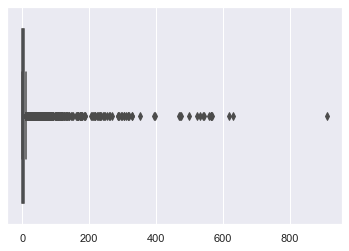

In [60]:
sns.boxplot(tmp) # 'bad distribution'

##### 2) List rare tokens

In [61]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [62]:
len(list_unique_words)

2114

In [63]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [64]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [65]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [66]:
len(list_max_2_words)

3446

In [67]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [68]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [69]:
len(list_max_5_words)

4677

In [70]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [71]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['curtain', 'polyester', 'enhances', 'interiors', 'eyelet', 'abstract', '2', 'price', 'features', 'door', 'look', '899', 'rs', 'floral', 'pack', '213', 'multicolor', 'elegance', 'height', 'cm', 'key']


In [72]:
len(set(corpus))

6165

In [73]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['curtain', 'polyester', 'enhances', 'interiors', 'eyelet', 'abstract', 'price', 'features', 'door', 'look', 'high', 'floral', 'quality', 'made', 'pack', 'multicolor', 'elegance', 'height', 'key']


In [74]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [75]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

1884          sale
15652     junction
5440        script
46305    perfectli
6963         funki
42412          kid
3277           mug
38449       around
11995         carv
48005        girli
25992        water
16942     deliveri
32654        plain
33340        creat
3954           set
14507         wood
7913           yet
30188          dri
40777       genuin
8419     printland
17524     guarante
47383         hair
21055        check
16588     showpiec
9413        messag
2233           led
25645       analog
11116        start
3902         gloss
16729       genuin
dtype: object

In [76]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'enhanc', 'eyelet', 'abstract', 'price', 'door', 'eleg', 'look', 'high', 'floral', 'polyest', 'made', 'pack', 'multicolor', 'interior', 'qualiti', 'height', 'key', 'featur']


In [77]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

41767            net
16620            lal
40256          light
39904           hour
19947       external
6981       shopizone
12631            day
47376          clean
6855      multicolor
45652          sheet
20386       replaced
36597           free
30255         number
38293      guarantee
5715          chakra
45183     handicraft
12151    replacement
5850      ornamental
37343    conditioner
40604           skin
46064        crystal
39451          price
33808           lord
40721        product
34087      checkered
33935       delivery
9700             mug
33712       painting
42408         detail
4726            wash
dtype: object

In [78]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['curtain', 'polyester', 'enhances', 'feature', 'eyelet', 'abstract', 'price', 'door', 'look', 'high', 'floral', 'quality', 'made', 'pack', 'multicolor', 'interior', 'elegance', 'height', 'key']


##### 5) Only english words

In [79]:
pd.Series(words.words()).sample(30)

30272          carbazole
155663       primitivist
84812     hermaphroditic
120133             moyen
162139       Quintillian
123377        neocytosis
29624            canette
167424         reptility
8873         ankylostoma
178672       seraphicism
163198             ranny
105376      legislatress
71493            fluster
179535        Shahaptian
121222            muster
209169           turbary
142072       peptogaster
104400       larkishness
130377              Olga
217658          unhonest
117114        misengrave
228968          Viperina
193683      sulphidation
143785      petrophilous
203892            titman
20961     benzotetrazole
173928         Saturnian
130341        oleography
64498      erroneousness
66894          experient
dtype: object

In [80]:
len(set(words.words()))

235892

In [81]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [82]:
len(set(eng_words))

234377

In [83]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['ababua', 'aaru', 'ab', 'aal', 'abaca', 'aaronit', 'ababdeh', 'aba', 'aalii', 'aam', 'aback', 'abaciscu', 'abac', 'abacay', 'aani', 'aardvark', 'a', 'aa', 'abactin', 'aardwolf', 'abacist', 'aaron', 'abacin']


In [84]:
len(set(eng_words_stem))

178311

In [85]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['ababua', 'abactinally', 'aaru', 'ab', 'aal', 'abactinal', 'abaca', 'ababdeh', 'aba', 'abacate', 'aalii', 'aam', 'aaronic', 'aaronite', 'aback', 'abac', 'abacay', 'aani', 'aardvark', 'a', 'aa', 'aaronitic', 'abacinate', 'abacination', 'aardwolf', 'abaciscus', 'aaronical', 'abacist', 'aaron']


In [86]:
len(set(eng_words_lem))

233450

In [87]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words, eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'enhanc', 'eyelet', 'abstract', 'price', 'door', 'eleg', 'look', 'high', 'floral', 'polyest', 'made', 'pack', 'multicolor', 'interior', 'qualiti', 'height', 'key', 'featur']


In [88]:
len(set(corpus))

2166

In [89]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words, eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

2252           ideal
5132         product
17102           need
1462            dial
31874          watch
15237    replacement
8678       fantastic
29396        forward
12833      guarantee
36426           year
33348          model
19010        product
25021            net
37349           date
37670       delivery
2794            hair
16290        genuine
32121       collagen
39051        perfect
34619          using
5553          indian
34983           bath
43491     compatible
23510         sonata
17896       designed
40517           girl
9523         kitchen
31007          water
34695          phone
37396           sale
dtype: object

In [90]:
len(set(corpus_lem))

2333

In [91]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [92]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [93]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [94]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

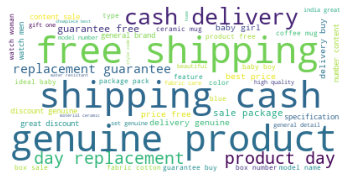

In [95]:
display_wordcloud([corpus_lem])

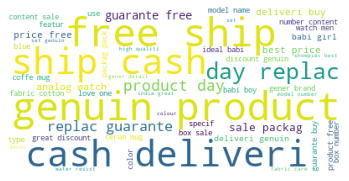

In [96]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [97]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [98]:
df_0.head()

,text,category,target
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [99]:
df_6.head()

,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [100]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [101]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [102]:
len(corpus_0)

72541

In [103]:
len(corpus_6)

49083

##### 2) Process all of them

In [104]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['p', 'h', 'i', 'o', 'c', 't', ' ', 'e', 'C', 's', 'S', 'y', 'a', 'f', 'n']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['H', 'o', 't', 'B', ' ', 'u', 'f', 'e', 'r', 's', 'y', 'a', 'K', 'F']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['i', 'e', 'y', 's', 'F', '2', 'u', 'L', 'D', 'A', 'o', '3', 't', ' ', '1', 'a', 'K', 'n', 'k', '0', 'r', 'P', 'f', '-']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['i', 'B', 'e', 'm', 'y', 's', 'u', 'L', 'o', 'c', 't', ' ', 'q', 'a', 'n', 'M', 'r', 'C', 'P']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['g', 'n', 'P', 'o', 'E', 't', 'c', ' ', 'u', 'f', 'e', 'r', 's', 'l', 'y', 'a', 'K', 'F']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [105]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                          rejoin=False,
                          list_rare_words=list_unique_words,
                          eng_words=eng_words_stem)

In [106]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['brand', 'gener', 'model', 'towel', 'yellow', 'ye', 'bath', 'machin', 'specif', 'blue', 'design', 'self', 'name', 'materi', 'cotton', 'red', 'type', 'featur', 'washabl']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['appli', 'girl', 'burt', 'damag', 'repair', 'dri', 'hair', 'condit', 'deep', 'specif', 'bee', 'ideal', 'shea', 'boy', 'condition', 'grapefruit', 'type', 'key', 'featur']


__A

In [107]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

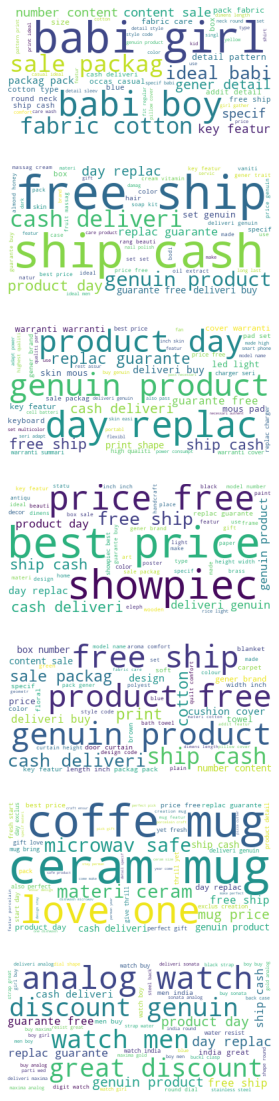

In [108]:
display_wordcloud(corpus_list)

In [109]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [110]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [111]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [112]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [113]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [114]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [115]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=30)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 203
The length of the set of duplicated words is 38


In [116]:
duplicated_words_set

['brand',
 'skin',
 'best',
 'beauti',
 'sale',
 'gift',
 'gener',
 'box',
 'girl',
 'price',
 'color',
 'print',
 'guarante',
 'packag',
 'genuin',
 'day',
 'inch',
 'number',
 'deliveri',
 'specif',
 'pack',
 'free',
 'design',
 'product',
 'ideal',
 'materi',
 'cover',
 'cotton',
 'ship',
 'set',
 'buy',
 'qualiti',
 'boy',
 'replac',
 'cash',
 'type',
 'light',
 'featur']

#### Final cleaning

##### 1) cleaning per document

In [117]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [118]:
data_text["clean_text"] = data_text.text.apply(lambda x: final_clean(x, process_text_5, "stem", list_unique_words, eng_words_stem, duplicated_words_set))

In [119]:
data_text.sample(20)

,text,category,target,clean_text
571,HMT OLSS 01 Analog Watch - For Women - Buy HM...,Watches,6,analog watch analog watch india round dial sta...
32,"D'Signer 681GM_WHT Analog Watch - For Men, Bo...",Watches,6,signer analog watch men signer analog watch me...
18,"Franck Bella FB74C Analog Watch - For Boys, M...",Watches,6,bella analog watch men bella analog watch men ...
607,Key Features of Aapno Rajasthan Lovely Jewelle...,Beauty and Personal Care,1,key love vaniti bodi stonewar compart love van...
697,Buy Wallmantra Abstract Colors Modern Art Wall...,Home Decor & Festive Needs,3,abstract modern art wall hang canva paint abst...
1038,"Key Features of Surgical e Sstudio S0004 Gown,...",Beauty and Personal Care,1,key surgic gown pant hospit scrub washabl high...
24,"fastrack 38015PL01 Analog Watch - For Men, Bo...",Watches,6,analog watch men analog watch men india stainl...
473,Key Features of Allin Exporters Fennel Oil (Co...,Beauty and Personal Care,1,key allin export fennel oil extract men applic...
622,Mee Mee Multifunctional Nursery Diaper Bag (Da...,Baby Care,0,nurseri diaper bag dark blue safeti health nur...
407,Buy TRENDnet N300 Wireless Home Router only fo...,Computers,2,wireless home router


In [120]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
Specifications of Esteem Baby Boy's Drawer General Details Ideal For Baby Boy's Pattern Printed Type Drawer Fabric Cotton Number of Contents in Sales Package Pack of 10 Fabric Care Gentle Hand Wash, Do Not Bleach, Wash With Cold Water, Do Not Wring, Do Not Iron On Elastic In the Box Sales Package 10 Drawer

__After__
babi drawer detail babi pattern drawer fabric content fabric care gentl hand wash bleach wash cold water wring iron elast drawer



__Before__
Specifications of Baby Bucket SHERIN MULTI BEAR Sleeping Bag (Green) General Brand Baby Bucket Space for 1 People Model Name SHERIN MULTI BEAR Tog Rating 4.5 Ideal For Baby Boys, BABY GIRLS Model ID Baby Bucket Soft Cotton Baby Boys & Baby Girl Sleeping Bag Color Green Dimensions Weight 299 g Height 65 cm Width 42 cm Depth 3 cm

__After__
babi bucket bear sleep bag green babi bucket space peopl model name bear rate babi babi model babi bucket soft babi babi sleep bag green dimens weight height width depth



__Before__
Ke

In [121]:
# check no missing values
data_text.isna().mean()

text          0.0
category      0.0
target        0.0
clean_text    0.0
dtype: float64

In [122]:
# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

##### 2) cleaning corpus (per category) (like above)

In [123]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [124]:
df_clean_0.head()

,text,category,target,clean_text
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...
40,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi green top pyjama fabric green kid...
42,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi blue grey top pyjama fabric blue ...
63,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key kohl wine bag yellow easi carri bit kohl w...


In [125]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                   rejoin=False,
                                                         lem_or_stem="stem",
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem,
                                                    extra_words=duplicated_words_set)

In [126]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [127]:
corpus_clean_0[:1000]

['bath',
 'towel',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'machin',
 'washabl',
 'self',
 'bath',
 'towel',
 'model',
 'name',
 'bath',
 'towel',
 'men',
 'model',
 'red',
 'yellow',
 'blue',
 'size',
 'length',
 'width',
 'content',
 'bath',
 'towel',
 'key',
 'terri',
 'face',
 'towel',
 'size',
 'small',
 'height',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bring',
 'soft',
 'towel',
 'export',
 'soft',
 'textur',
 'care',
 'give',
 'feel',
 'export',
 'bath',
 'towel',
 'last',
 'year',
 'famou',
 'fine',
 'absorb',
 'soft',
 'durabl',
 'note',
 'shrinkag',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dri',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bath',
 'towel',
 'terri',
 'face',
 'towel',
 'model',
 'name',
 'men',
 'model',
 'size',
 'small',
 'assort',
 '

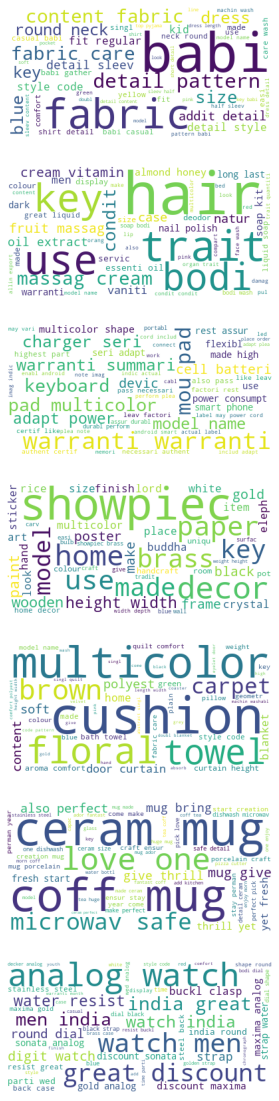

In [128]:
display_wordcloud(corpus_clean_list)

### II) Transformations

In [129]:
data = pd.read_csv(output_path + "final_data_text.csv")

In [130]:
data

,text,category,target,clean_text
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key eleg polyest multicolor abstract eyelet do...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key royal fashion king size doubl royal wed ro...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key floral king size doubl floral king size do...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker doubl stic...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker bring home exclus p...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...


#### 1) Bag of Words

##### 1) Comptage de mots : 1-gramme, bi-gramme, tri-gramme, n-gramme

In [131]:
# 1) texte / 2) images (paralleles can do)
# 1 vocab pour chaque doc

# texte :
# nettoyage du texte / normalisation (pré ttt cf notebook)
# bag of words
# reduction dimension tSNE ici
# 7 clusters
# ARI score : sur la valeur à obtenir 0.4/0.5 (0.6 ou 0.7)
# objectifs : cours OC x2 + webinair / Youtube
# vendredi

##### 2) TF-IDF

#### 2) Words Embeddings : Word2Vec

#### 3) Words Embeddings : BERT

#### 4) Words Embeddings : USE (Universal Sentence Encoder)

## Part II : Dimension Reduction

In [132]:
# pour le texte : permet de visualiser en 2D ACP / tSNE


## Part III : Clustering

In [133]:
print(1)

1


In [134]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 591.289175 sec
computing time : 00:09:51
